<a href="https://colab.research.google.com/github/y33-j3T/TensorFlow/blob/master/Celsius_to_Fahrenheit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Celsius to Fahrenheit
The problem we will solve is to convert from Celsius to Fahrenheit, where the approximate formula is:

$$ f = c \times 1.8 + 32 $$

Instead of using a conventional Python function that directly performs this calculation, we will be using machine learning.

We will give TensorFlow some sample Celsius values and their corresponding Fahrenheit values.

Then, we will train a model that figures out the above formula through the training process.



## Import dependencies


In [0]:
from __future__ import absolute_import, division, print_function

import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)

import numpy as np

## Set up training data
We will create two lists, `celsius` and `fahrenheit` to train our model.

### Some machine learning terminology
- **Feature** -- The input(s) to our model. In this case, a single value -- the degrees in Celsius.

- **Labels** -- The output our model predicts. In this case, a single value -- the degrees in Fahrenheit.

- **Example** -- A pair of inputs/outputs used during training. In this case a pair of values from `celsius` and `fahrenheit` at a specific index.

In [35]:
celsius    = np.array([-40, -10,  0,  8, 15, 22,  38], dtype=float)
fahrenheit = np.array([-40,  14, 32, 46, 59, 72, 100], dtype=float)

for i,c in enumerate(celsius):
  print("{} degrees Celsius = {} degrees Fahrenheit".format(c, fahrenheit[i]))

-40.0 degrees Celsius = -40.0 degrees Fahrenheit
-10.0 degrees Celsius = 14.0 degrees Fahrenheit
0.0 degrees Celsius = 32.0 degrees Fahrenheit
8.0 degrees Celsius = 46.0 degrees Fahrenheit
15.0 degrees Celsius = 59.0 degrees Fahrenheit
22.0 degrees Celsius = 72.0 degrees Fahrenheit
38.0 degrees Celsius = 100.0 degrees Fahrenheit


## Create the model
Next we create the model. We will use the simplest possible model we can, a Dense network, Since the problem is straightforward, this network will require only a single layer, with a single neuron.

### Build a layer
We'll call the layer `l0` and create it by instantiating `tf.keras.layers.Dense` with the following configuration:

- `input_shape=[1]` -- This specifies that the input to this layer is a single value. That is, the shape is a 1d-array  with one member. 

- `units=1` -- This specifies the number of neurons in the layer. The number of neurons defines how many internal variables the layer has to try to learn how to solve the problem.

In [0]:
l0 = tf.keras.layers.Dense(units=1, input_shape=[1])

### Assemble layers into the model
Once layers are defined, they need to be assembled into a model. The Sequential model definition takes a list of layers as argument, specifying the calculation order from the input to the output.

In [0]:
model = tf.keras.Sequential([l0])

### Compile the model, with loss and optimizer functions 
- **Loss function** -- A measure of how far off predictions are from the desired outcome.

- **Optimizer function** -- A way of adjusting internal values in order to reduce the loss.

In [0]:
model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(0,1))

## Train the model
During training,

1. The model takes in Celsius values.
2. Performs calculations using current weights
3. Output values
4. Calculates difference between actual and desired output using the loss function
5. Directs how weights should be adjusted using the optimizer function

In [39]:
history = model.fit(celsius, fahrenheit, epochs=500, verbose=False)
print("Finished training the model")

Finished training the model


## Display training statistics
The `fit` method returns a history object. We can use this object to plot how the loss of our model goes down after each training epoch.

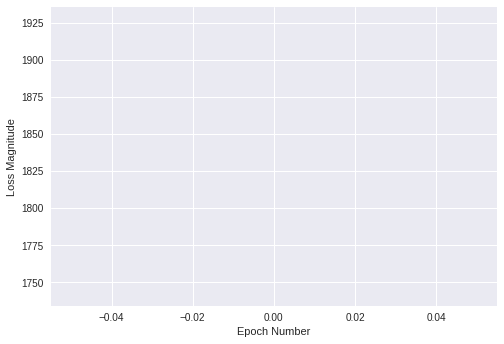

In [40]:
import matplotlib.pyplot as plt
plt.xlabel("Epoch Number")
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])

## Use model to predict values

In [41]:
print(model.predict([100.0]))

[[nan]]


## Looking at the layer weights

In [30]:
print("These are the layer weights: {}".format(l0.get_weights()))

These are the layer weights: [array([[nan]], dtype=float32), array([nan], dtype=float32)]
